# Introducción

El siguiente cuaderno busca realizar estimaciones de la incertidumbre por medio de método de Monte Carlo (*MCM*). Esto se realiza siguiendo la recomendación **JCGM 101:2008 "Evaluation of measurement data — Supplement 1 to the “Guide to the expression of uncertainty in measurement” — Propagation of distributions using a Monte Carlo method"**

Todo lo relacionado con términos, definiciones, convenciones, notación y referencias normativas se puede consultar en los primeros cuatro capítulos de la JCGM 101:2008, este cuaderno es un acompañamiento a partir del capítulo cinco.

# Pasos de la evaluación de la incertidumbre

1. Formulación: los casos que se trataarán requieren de escribir $Y$, el mensurando, como una función de todas las $X_{i}$ que se desean tomar en cuenta. De forma que se tenga un modelo claro y a cada una de las $X_{i}$ se les debe asignar una función de distribución de probabilidad (*PDF*).
2. Propagación: a través del modelo, se propagan todas las *PDF* para obtener la *PDF* de $Y$.
3. Simplificación: se reportan los resultados, un valor asociado a $Y$, su valor esperado, con una desviación estándar y el correspondiente factor de cobertura.

## Construyendo la *PDF* de $Y$

Para poder propagar las distintas *PDF's* hasta $Y$, se aplica el *MCM*. La JCGM 101:2008 propone este algorimo:

1. Seleccionar el número $M$ de ensayos de Monte Carlo.
2. Generar $M$ vectores de cada una de as N cantidades $X_{i}$.
3. Para cada vector, calcular el valor de $Y$, obteniendo un total de $M$ $Y$'s.
4. Acomodar los valores en $Y$ en orden creciente, para poder estimar $G$.
5. Usar $G$ para obtener el estimado $y$ y la incertidumbre est'andar $u(y)$.
6. Usar $G$ para determinar el factor de covertura para $Y$ con una probabilidad $p$ escigida.


![algoritmo](figuras/algoritmoMCM.PNG)

1. $f$ es continuo para todos los $X_{i}$ en las cercanías de cada estimado $x_{i}$.
2. $Y$ tiene una función de distribución continua y estrictamente creciente.
3. La *PDF* de $Y$ es estrictamente positiva, unimodal. Además, creciente a la izquierda del modo y decreciente a la derecha de esta.
4. Existe un valor esperado $E(Y)$ y un varianza $V(Y)$.
5. $M$ es lo suficientemente grande.

Este método no requiere de estimar las derivadas parciales de $Y=f(X)$, puesto que depende del muestreo que se haga sobre cada función de distribución. En general no será necesario clasificar las fuentes de incertidumbre en Tipo A o Tipo B; sin embargo, para efectos de este cuaderno, se realizará para poderlo asociar un proceso de medición más real.

# *PDF's* para las variables de entrada

Se debe tomar en cuenta si las cantidades $X_{i}$ son independientes o dependientes entre sí. Esto determinará la forma en la que se deberá hacer el análisis para que cada *PDF* se asigne según se determine. Se pueden asignar algunas *PDF's* conjuntas si existen variables que no son independientes.

Para los casos iniciales, no se analizarán sistemas que requieran de distribuciones de probabilidad conjuntas, una vez que se ahonde más en el teorema de Bayes se podrán explorar otro tipo de modelos.

Además, inicialmente no se trabajará con variables que no se hayan medido con anterioridad o que sean desconocidas, esto requiere de trabajar con el principio de Entropía Máxima, y se odrá realizar más adelante.

## *PDF's* comunes

### Rectangular/Uniforme

Si sólo se conocen los límites superior $b$ e inferior $a$, con $a<b$, se asignaría una distribución rectangular en el intervalo $[a,b]$.

<div class="math">
\begin{equation}
    g_{X}(\xi)
    =
    \left\{
        \begin{array}{ll}
            1/(b-a),\,& a\leq\xi\leq b,\\
            0, & \xi< a\textrm{ o }b< \xi.
        \end{array}
    \right.
\end{equation}
</div>

Para este caso, se tiene que:

$$E(X)=\frac{a+b}{2},\quad V(X)=\frac{(b-a)^2}{12}$$

Para hacer los muestreos en distribuciones rectangulares se utilizará ```numpy.random.uniform```, que permite generar números aleatorios siguiendo una distribución rectangular entre los números $a$ y $b$.

### Trapezoidal

En la figura siguiente, se observa la forma que tiene la distribución trapezoidal.

![algoritmo](figuras/trapezoidal.PNG)

Tomando:

$$a=a_{1}+a_{2},\quad b=b_{1}+b_{2},\quad \beta=\frac{\lambda_{1}}{\lambda_{2}},\quad x=\frac{a+b}{2}$$

Donde:

$$\lambda_{1}=\frac{[(b_{1}-a_{1})-(b_{2}-a_{2})]}{2},\quad \lambda_{2}=\frac{b-a}{2}$$

Se puede escribir la *PDF* como:

<div class="math">
\begin{equation}
    g_{X}(\xi)
    =
    \left\{
        \begin{array}{ll}
            (\xi-x+\lambda_{2})/(\lambda_{2}^2-\lambda_{1}^2), & x-\lambda_{2}\leq \xi < x-\lambda_{1}, \\
            1/(\lambda_{1}+\lambda_{2}), & x-\lambda_{1}\leq\xi\leq x+\lambda_{1}, \\
            (x+\lambda_{2}-\xi)/(\lambda_{2}^2-\lambda_{1}^2), & x+\lambda_{1}<\xi\leq x+\lambda_{2}, \\
            0, & \textrm{de otra forma}.
        \end{array}
    \right.
\end{equation}
</div>

Esta distribución tiene un valor esperado y una varianza:

$$E(X)=\frac{a+b}{2},\quad V(X)=\frac{(b-a)^2}{24}(1+\beta^2)$$

Para hacer un muestreo de una distribución trapezoidal será necesario generar dos valores de una distribución uniforme en $[0,1]$, de forma que:

$$\xi=a+\frac{b-a}{2}\left[(1+\beta)r_{1}+(1-\beta)r_{2}\right]$$

### Triangular

Conociendo la moda $c$, que se encuentra en $[a,b]$, se puede seleccionar una distribución triangular; sin embargo, esta es por lo general desaconsejada por la *GUM*. Para generar números aleatorios usando esta distribución se puede utilizar ```numpy.random.triangular``` para la cual sólo es necesario digitar los valores de $a$, $b$ y $c$.

Para esta distribución, se tiene que:

$$E(X)=\frac{a+b+c}{3},\quad V(X)=\frac{a^2+b^2+c^2-ab-ac-bc}{18}$$

### t-Student

Usnado ```numpy.random.standard_t``` se pueden generar números aleatorios de una distribución t-Student con un n'umero conocido de grados de libertad. En este caso los valores obtenidos vendrán de la distribución estándar, con:

$$E(X)=0,\quad V(X)=\frac{\nu}{\nu-2}$$

Con $\nu>2$. Se puede entonces desplazar la distribución sumando la media deseada.

Para simular una incertidumbre Tipo A, es necesario plantear que:

$$\xi=\bar{x}+\frac{s}{\sqrt{n}}t$$

Donde $t$ proviene de una distribución estándar t-Student con $n-1$ grados de liberdad.

Si como fuente se desea usar un certificado de calibración, es conveniente utilizar una distribución t-Student, que utilice los grados efectivos de libertad $\nu_{eff}$, el valor reportado y una varianza $(U/k)^2$.

### Gaussiana/Normal

Usando ```numpy.random.normal``` se pueden generar números aleatorios a partir de una distribución Gaussiana, con una media y desviación estándar conocidas.

### Otras funciones

Dependiendo de la información que se tenga del problema, así como de las variables que se van a incluir para determinar la *PDF* de $Y$, será necesario utilizar distribuciones como la Gaussiana, la Gaussiana multivariada, la U, la exponencial o la Gamma. De momento no se tomarán estas en cuenta.

In [1]:
# se realizan las importaciones necesarios
import numpy as np
from numpy.random import standard_t
from numpy.random import normal
from numpy.random import uniform
import matplotlib.pyplot as plt
print("Todas las librerías han sido importadas.")

Todas las librerías han sido importadas.


# Ejemplo 1: Propagación de distribuciones simple

A continuación, se simulará un proceso de medición que ya se realizó: densidad de aire, para unas condiciones ya conocidas de temperatura, presión y humedad relativa. La idea es poder obtener la estimación de la incertidumbre por este medio para evaluar el funcionamiento del algorimo. Se incluyen $10$ muestreos en cada variabl; sin embargo, en la práctica se suele tomar una muestra al inicio y una al final, pero para poder experimentar con algoritmo de mejor manera, se tomó un muestreo mayor.

## Número de ensayos

De acuerdo con la JCGM 101:2008, el número $M$ de ensayos a realizar deb ser al menos $10^4$ veces mayor que el valor de $1/(1-p)$, de forma que si se desea un factor de covertura al $95\%$ será necesario hacer al menos $0.2\times10^{6}$ ensayos, que redondeando hacia el número mayor podría pensarse en $10^6$.

In [2]:
M=10**6

## Variables de entrada

In [3]:
# parámetros de las variables de entrada
## Presión
P=858.6 # hPa
### Resolución
res_p=0.1
br_p=res_p/2
### EMP
EMP_p=0.25
be_p=EMP_p
### Deriva
D_p=EMP_p/3
bd_p=D_p
### Variación
V_P=0.2
bv_p=np.abs(V_P)
### Muestreo
a_p=standard_t(9,size=M)*0.01/np.sqrt(10)+P

In [4]:
## Humedad relativa
HR=0.688 # hPa
### Resolución
res_hr=0.001/100
br_hr=res_hr/2
### EMP
EMP_hr=0.01
be_hr=EMP_hr
### Deriva
D_hr=EMP_hr/3
bd_hr=D_hr
### Variación
V_HR=-0.009
bv_hr=np.abs(V_HR)
### Muestreo
a_hr=standard_t(9,size=M)*0.001/np.sqrt(10)+HR

In [5]:
## Temperatura
T=25.3 # hPa
### Resolución
res_t=0.1
br_t=res_t/2
### EMP
EMP_t=0.2
be_t=EMP_t
### Deriva
D_t=EMP_t/3
bd_t=D_t
### Variación
V_T=0.2
bv_t=np.abs(V_T)
### Muestreo
a_t=standard_t(9,size=M)*0.01/np.sqrt(10)+T

In [6]:
Presión=uniform(-br_p,br_p,size=M)+uniform(-be_p,be_p,size=M)+uniform(-bd_p,bd_p,size=M)+uniform(-bv_p,bv_p,size=M)+a_p

In [7]:
Temperatura=uniform(-br_t,br_t,size=M)+uniform(-be_t,be_t,size=M)+uniform(-bd_t,bd_t,size=M)+uniform(-bv_t,bv_t,size=M)+a_t

In [8]:
HumedadR=uniform(-br_hr,br_hr,size=M)+uniform(-be_hr,be_hr,size=M)+uniform(-bd_hr,bd_hr,size=M)+uniform(-bv_hr,bv_hr,size=M)+a_hr

In [9]:
def Densidad(P,T,HR):
    return (0.348444*P+HR*(0.00252*T-0.020582))/(T+273.15)

In [10]:
G_rho=Densidad(Presión,Temperatura,HumedadR).tolist()
G_rho.sort()

In [11]:
G_rho=np.array(G_rho)

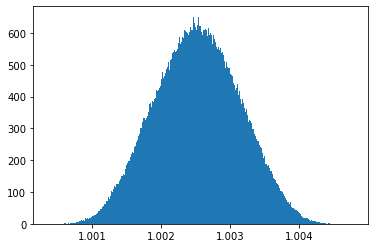

In [12]:
plt.hist(G_rho,bins=1000,density=True)
plt.show()

In [13]:
rho_a=G_rho.mean()

In [14]:
u_rho=G_rho.std() # np.sqrt(((G_rho-rho_a)**2).sum()/(M-1))

In [15]:
rho_a,u_rho

(1.0025258555919268, 0.0006137200880337773)

In [16]:
(M-0.95*M)/2

25000.0

# Ejemplo 2: Muestreo multivariado

Para este caso, se le dará continuidad al problema anterior. En el caso anterior, se tomaron los instrumentos como si midieran por seprado, por eso tenían cada uno su distribución por separado. Sin embargo, esto no siempre es cierto. Para el caso de un barotermohigrómetro, que reliza mediciones de las tres cantidades al mismo tiempo, es necesario incluir correlaciones, así como una distribución de probabilidad conjunta.

## Construyendo una distribución de probabilidad conjunta

La recomendación recomendación JCGM 101:2008 únicamente habla del uso de una distribución Gaussiana multivariada, y explica la forma correcta para realizar el muestreo, para efectos de Python, se puede utilizar la función ```numpy.random.multivariate_normal``` Es necesario conocer el vector de medias y la matriz de covarianzas propuesta, esta es muy importante, pues se requiere para poder establecer las correlaciones más adelante.

No existe un histórico de datos para construir la matriz de covarianza; sin embargo, los valore asignados a cada variable provienen de un promedio que se tomó entre las mediciones inicil y final, por lo que en este caso se tomarán ambos datos para poder construir la matriz de covarianzas que se calculará utilizando ```numpy.cov```.

In [17]:
from numpy.random import multivariate_normal

In [18]:
# matriz de datos
A=np.array([[858.7,858.5],
            [25.4,25.2],
           [0.683,0.692]])

In [19]:
# matriz de covarianzas
np.cov(A)

array([[ 2.00e-02,  2.00e-02, -9.00e-04],
       [ 2.00e-02,  2.00e-02, -9.00e-04],
       [-9.00e-04, -9.00e-04,  4.05e-05]])

Se observan entonces covarianzas positivas para temperatura y presión, y negativas todas las que incluyen a la humedad relativa.

In [20]:
MuestreoMultiVariado=multivariate_normal(np.array([P,T,HR]),np.cov(A),size=M)

In [21]:
Presión=MuestreoMultiVariado[:,0]+uniform(-br_p,br_p,size=M)+uniform(-be_p,be_p,size=M)+uniform(-bd_p,bd_p,size=M)+uniform(-bv_p,bv_p,size=M)

In [22]:
Temperatura=MuestreoMultiVariado[:,1]+uniform(-br_t,br_t,size=M)+uniform(-be_t,be_t,size=M)+uniform(-bd_t,bd_t,size=M)+uniform(-bv_t,bv_t,size=M)

In [23]:
HumedadR=MuestreoMultiVariado[:,2]+uniform(-br_hr,br_hr,size=M)+uniform(-be_hr,be_hr,size=M)+uniform(-bd_hr,bd_hr,size=M)+uniform(-bv_hr,bv_hr,size=M)

In [24]:
G_rho=Densidad(Presión,Temperatura,HumedadR).tolist()
G_rho.sort()

In [25]:
G_rho=np.array(G_rho)

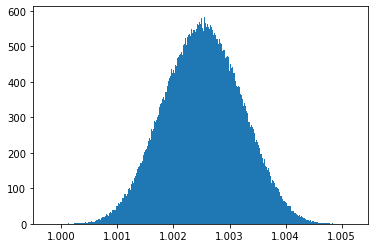

In [26]:
plt.hist(G_rho,bins=1000,density=True)
plt.show()

In [27]:
rho_a=G_rho.mean()

In [28]:
u_rho=G_rho.std()

In [29]:
rho_a,u_rho

(1.002524401723284, 0.0006872487357190778)

Se observa que al incluir las correlaciones, la incertidumbre estándar estimada aumentó. Si se contara con una mayor cantidad de datos se podría estimar mejor la matriz de covarianzas y el resultado obtenido sería mejor.

# Ejemplo 3: Procedimiento adaptativo

El método adaptativo busca realizar $M$ ensayos un total de $h$ de veces, según se cumpla la tolerancia deseada, con $h\geq2$. Al final del método se puede obtener un mejor estimado del mensurando de la forma:

$$y=\frac{1}{h}\sum_{r=1}^{h}y^{r}$$

Donde:
- $y^{r}$ es el promedio de los $M$ resultados obtenidos en el ensayo $r$.

Además, se debe estimar la desviación estándar como:

$$s_{y}^{2}=\frac{1}{h(h-1)}\sum_{r=1}^{h}(y^{r}-y)^{2}$$

Esto se debe calcular también para $y_{low}$, $y_{high}$ y $u(y)$, de forma que se conozcan las desviaciones estándar y valores de cada uno.

Los pasos del método adaptativo son:

1. Se inicia por definir la tolerancia del proceso, la recomendación propone escribir la incertidumbre estándar buscada $z$,  con $n_{dig}$ cifras signinificativas, la forma $c\times10^{l}$, para luego escribir la tolerancia del proceso como:
$$\delta=\frac{1}{2}10^{l}$$
2. Definir $M$, este se obtiene de seleccionar el máximo entre $10^4$ y $J$, donde $J$ corresponde al número entero menor más cercano a $100/(1-p)$.
3. Iniciar el conteo de $h$.
4. Realizar el procedimiento regular para estimar los parámetros de interés y almacenarlos.
5. $h+=1$ y se repite el punto 4.
6. Cuando ya se tiene que $h>1$, entonces se estiman los valores de $y$ y $u(y)$ promedio, y sus desviaciones estándar.
7. Si $s_{y}$ o $s_{u(y)}$ son mayores a $\delta$, se hace $h+=1$ y se repite desde $4$.

In [30]:
# se inicializa
h=1
p=0.95
M=max([10**4,100/(1-p)])
A=np.array([[858.7,858.5],
            [25.4,25.2],
           [0.683,0.692]])
np.cov(A)
d=0.5*10**(-5)
MuestreoMultiVariado=multivariate_normal(np.array([P,T,HR]),np.cov(A),size=M)
Presión=MuestreoMultiVariado[:,0]+uniform(-br_p,br_p,size=M)+uniform(-be_p,be_p,size=M)+uniform(-bd_p,bd_p,size=M)+uniform(-bv_p,bv_p,size=M)
Temperatura=MuestreoMultiVariado[:,1]+uniform(-br_t,br_t,size=M)+uniform(-be_t,be_t,size=M)+uniform(-bd_t,bd_t,size=M)+uniform(-bv_t,bv_t,size=M)
HumedadR=MuestreoMultiVariado[:,2]+uniform(-br_hr,br_hr,size=M)+uniform(-be_hr,be_hr,size=M)+uniform(-bd_hr,bd_hr,size=M)+uniform(-bv_hr,bv_hr,size=M)
G_rho=Densidad(Presión,Temperatura,HumedadR).tolist()
G_rho.sort()
G_rho=np.array(G_rho)
rho_a=G_rho.mean()
u_rho=G_rho.std()

# se prepara la matriz hxM, y los vectores y y u(y).

H=G_rho.reshape(1,M)
y=np.array([rho_a])
uy=np.array([u_rho])

# se inician los ensayos

while True:
    MuestreoMultiVariado=multivariate_normal(np.array([P,T,HR]),np.cov(A),size=M)
    Presión=MuestreoMultiVariado[:,0]+uniform(-br_p,br_p,size=M)+uniform(-be_p,be_p,size=M)+uniform(-bd_p,bd_p,size=M)+uniform(-bv_p,bv_p,size=M)
    Temperatura=MuestreoMultiVariado[:,1]+uniform(-br_t,br_t,size=M)+uniform(-be_t,be_t,size=M)+uniform(-bd_t,bd_t,size=M)+uniform(-bv_t,bv_t,size=M)
    HumedadR=MuestreoMultiVariado[:,2]+uniform(-br_hr,br_hr,size=M)+uniform(-be_hr,be_hr,size=M)+uniform(-bd_hr,bd_hr,size=M)+uniform(-bv_hr,bv_hr,size=M)
    G_rho=Densidad(Presión,Temperatura,HumedadR).tolist()
    G_rho.sort()
    G_rho=np.array(G_rho)
    rho_a=G_rho.mean()
    u_rho=G_rho.std()
    H=np.append(H,G_rho.reshape(1,M),axis=0)
    y=np.append(y,rho_a)
    uy=np.append(uy,u_rho)
    
    h+=1
    
    sy=np.sqrt(1/(h*(h-1))*((y.mean()-y)**2).sum())
    suy=np.sqrt(1/(h*(h-1))*((uy.mean()-uy)**2).sum())
    
    if 2*sy<d or 2*suy<d: # para si se cumple el criterio de tolerancia
        break
    else:
        pass # continua si no
valor=H.mean() # el mejor estimador de y es el promedio de la matriz hxM
incertidumbre=H.std() # la incertidumbre estándar viene de la matriz hxM también

In [31]:
valor,incertidumbre,h

(1.002525127211968, 0.0006872469961063696, 2)